In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
train= pd.read_csv('SalaryData_Train(1).csv')
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
train.info()

#(no null values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [7]:
train.duplicated().sum()

#(there are some duplicate values)

3258

In [8]:
train= train.drop_duplicates()
train

#(removed all the deplicate cvalues)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
30155,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [9]:
label_encoder= preprocessing.LabelEncoder()
train['maritalstatus']= label_encoder.fit_transform(train['maritalstatus'])
train['age']= label_encoder.fit_transform(train['age'])
train['workclass']= label_encoder.fit_transform(train['workclass'])
train['education']= label_encoder.fit_transform(train['education'])
train['occupation']= label_encoder.fit_transform(train['occupation'])
train['relationship']= label_encoder.fit_transform(train['relationship'])
train['race']= label_encoder.fit_transform(train['race'])
train['sex']= label_encoder.fit_transform(train['sex'])
train['native']= label_encoder.fit_transform(train['native'])
train['Salary']= label_encoder.fit_transform(train['Salary'])

#(convertion of catogrical data to numeric data using labelencoder)

<ipython-input-9-12ca2700a03d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['maritalstatus']= label_encoder.fit_transform(train['maritalstatus'])
<ipython-input-9-12ca2700a03d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['age']= label_encoder.fit_transform(train['age'])
<ipython-input-9-12ca2700a03d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

<ipython-input-10-518bafcd2562>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  [plt.subplot(4,2,1), sns.countplot(data=train, y='workclass')];


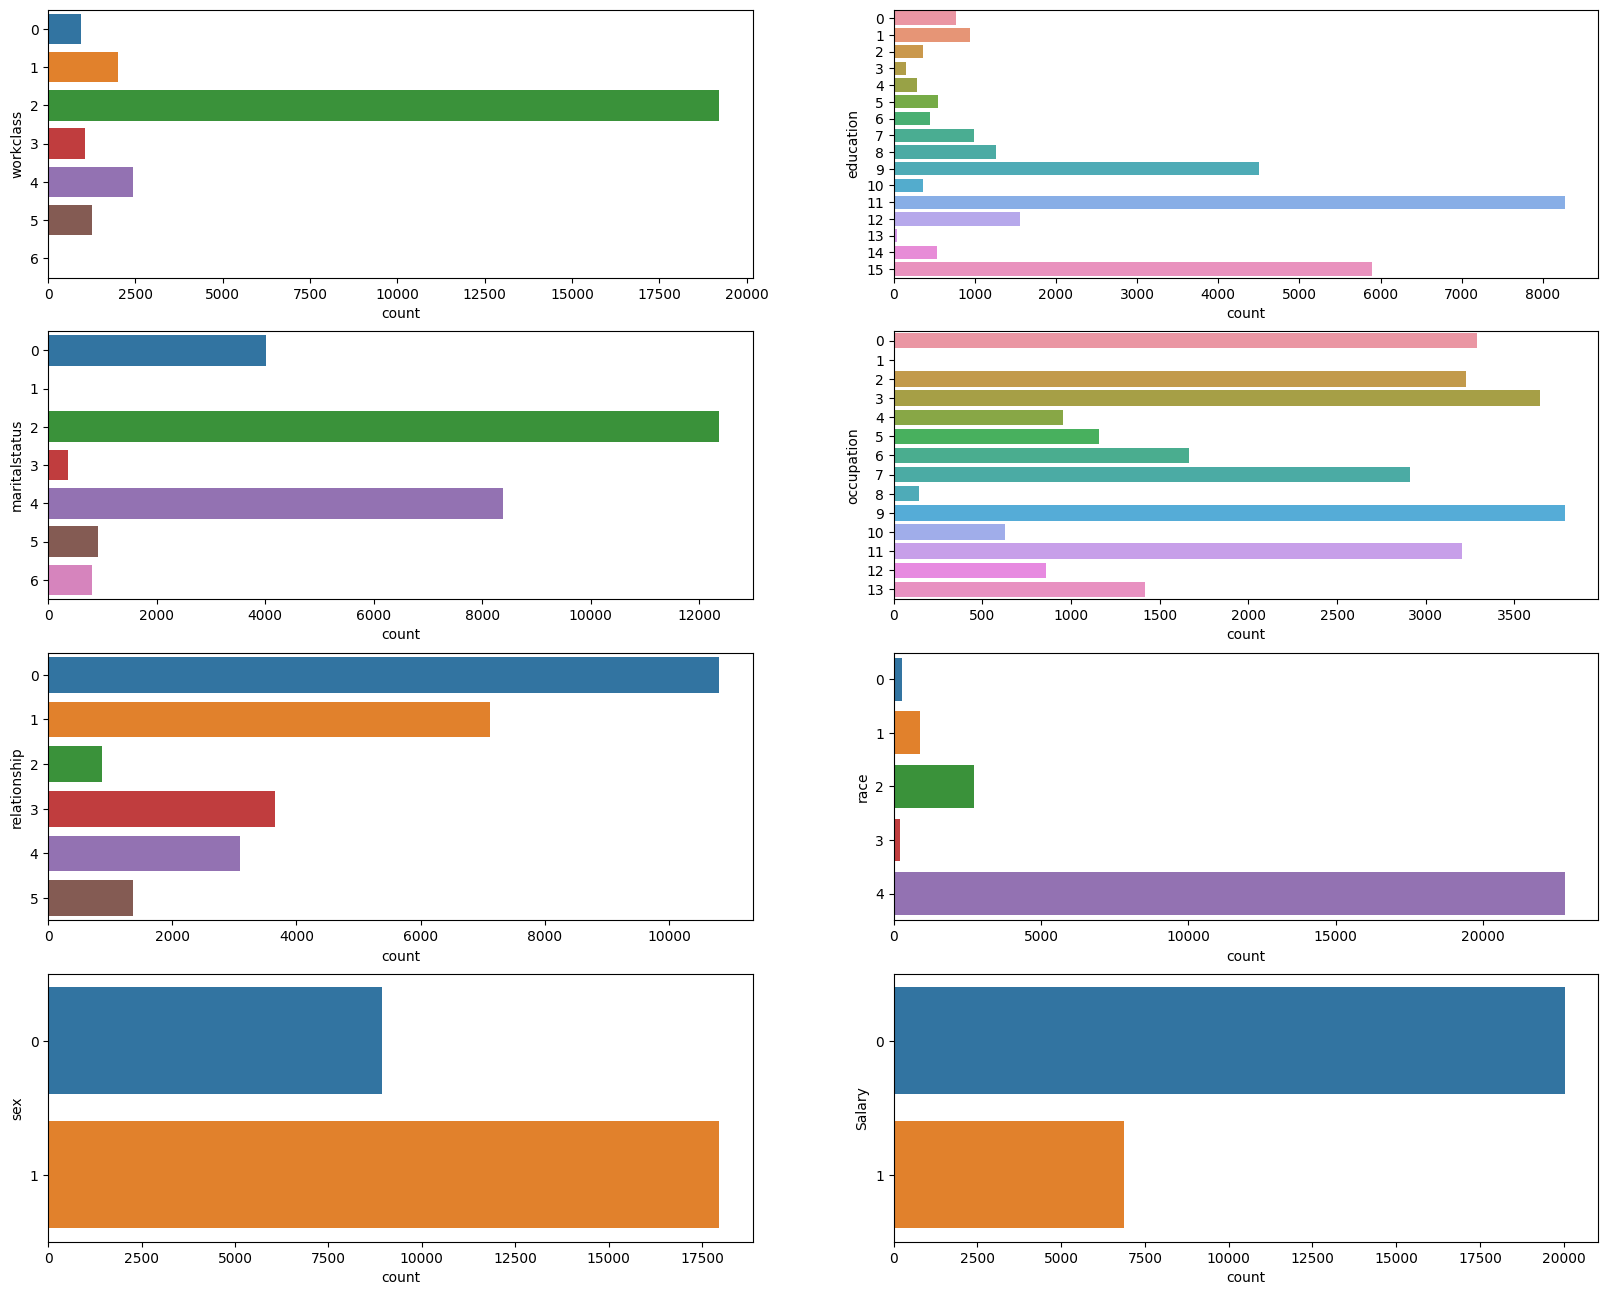

In [10]:
plt.subplots(figsize=(20,16))
[plt.subplot(4,2,1), sns.countplot(data=train, y='workclass')];

[plt.subplot(4,2,2), sns.countplot(data=train, y='education')];

[plt.subplot(4,2,3), sns.countplot(data=train, y='maritalstatus')];

[plt.subplot(4,2,4), sns.countplot(data=train, y='occupation')];

[plt.subplot(4,2,5), sns.countplot(data=train, y='relationship')];

[plt.subplot(4,2,6), sns.countplot(data=train, y='race')];

[plt.subplot(4,2,7), sns.countplot(data=train, y='sex')];

[plt.subplot(4,2,8), sns.countplot(data=train, y='Salary')];

#(displaying all the variable data)

In [11]:
corre= pd.DataFrame(train,columns = ['age','educationno','capitalgain','capitalloss','hoursperweek'])

#(creating different dataframe to the numeric variables)

In [12]:
cor=corre.corr()
cor

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.038061,0.077263,0.052739,0.072596
educationno,0.038061,1.000000,0.126085,0.080025,0.145491
capitalgain,0.077263,0.126085,1.000000,-0.036023,0.079403
capitalloss,0.052739,0.080025,-0.036023,1.000000,0.049093
hoursperweek,0.072596,0.145491,0.079403,0.049093,1.000000


<Axes: >

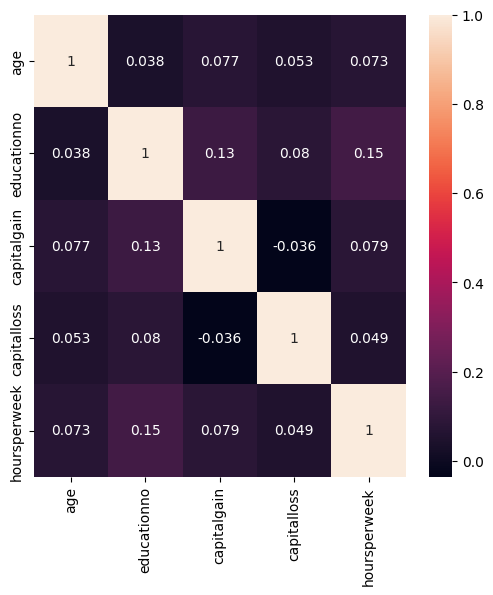

In [13]:
plt.figure(figsize=(6,6))
sns.heatmap(cor,annot=True)

#(correlation of the numeric variables)

<ipython-input-38-21000e136f60>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)
<ipython-input-38-21000e136f60>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train['age'],shade=True,color='r');


<Axes: xlabel='age'>

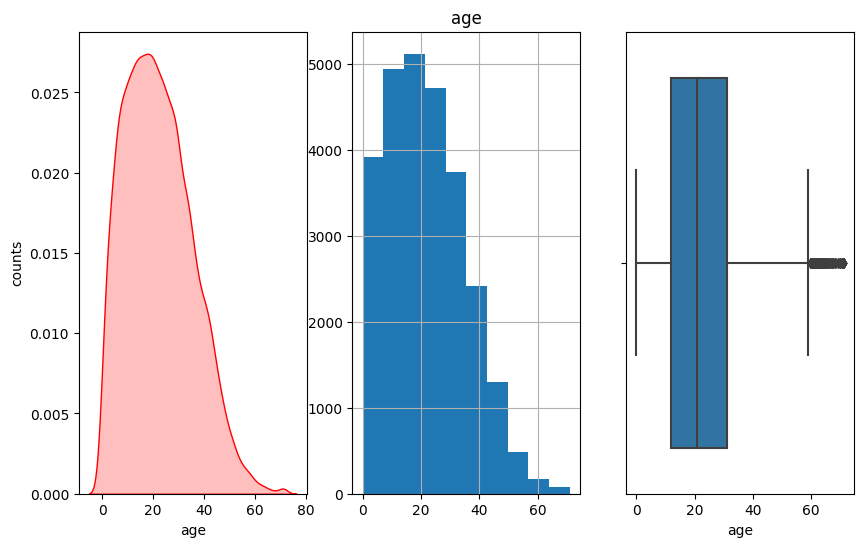

In [38]:
plt.subplots(figsize=(10,6))
plt.subplot(1,3,1)
sns.kdeplot(train['age'],shade=True,color='r');
plt.xlabel('age');
plt.ylabel('counts')
plt.subplot(1,3,2)
train['age'].hist()
plt.title("age")
plt.subplot(1,3,3)
sns.boxplot(x=train["age"])

In [15]:
train

#(fully cleaned train dataset)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,33,4,9,13,2,3,0,4,1,0,0,13,37,0
2,21,2,11,9,0,5,1,4,1,0,0,40,37,0
3,36,2,1,7,2,5,0,2,1,0,0,40,37,0
4,11,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,36,2,12,14,2,3,0,4,1,0,0,40,37,1
30155,5,2,15,10,4,10,1,4,1,0,0,40,37,0
30156,10,2,7,12,2,12,5,4,0,0,0,38,37,0
30158,41,2,11,9,6,0,4,4,0,0,0,40,37,0


In [16]:
test= pd.read_csv('SalaryData_Test(1).csv')
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [17]:
test.info()

#(no null values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [18]:
#there are some duplicate values
test.duplicated().sum()

930

In [19]:
#dropping all duplicate values
test= test.drop_duplicates()

In [20]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [21]:
#converting catogirical data to thenumeric data
label_encoder= preprocessing.LabelEncoder()
test['maritalstatus']= label_encoder.fit_transform(test['maritalstatus'])
test['age']= label_encoder.fit_transform(test['age'])
test['workclass']= label_encoder.fit_transform(test['workclass'])
test['education']= label_encoder.fit_transform(test['education'])
test['occupation']= label_encoder.fit_transform(test['occupation'])
test['relationship']= label_encoder.fit_transform(test['relationship'])
test['race']= label_encoder.fit_transform(test['race'])
test['sex']= label_encoder.fit_transform(test['sex'])
test['native']= label_encoder.fit_transform(test['native'])
test['Salary']= label_encoder.fit_transform(test['Salary'])



<ipython-input-21-60e1dd92e722>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['maritalstatus']= label_encoder.fit_transform(test['maritalstatus'])
<ipython-input-21-60e1dd92e722>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['age']= label_encoder.fit_transform(test['age'])
<ipython-input-21-60e1dd92e722>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

<ipython-input-22-534e462e36a2>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  [plt.subplot(4,2,1), sns.countplot(data=test, y='workclass')];


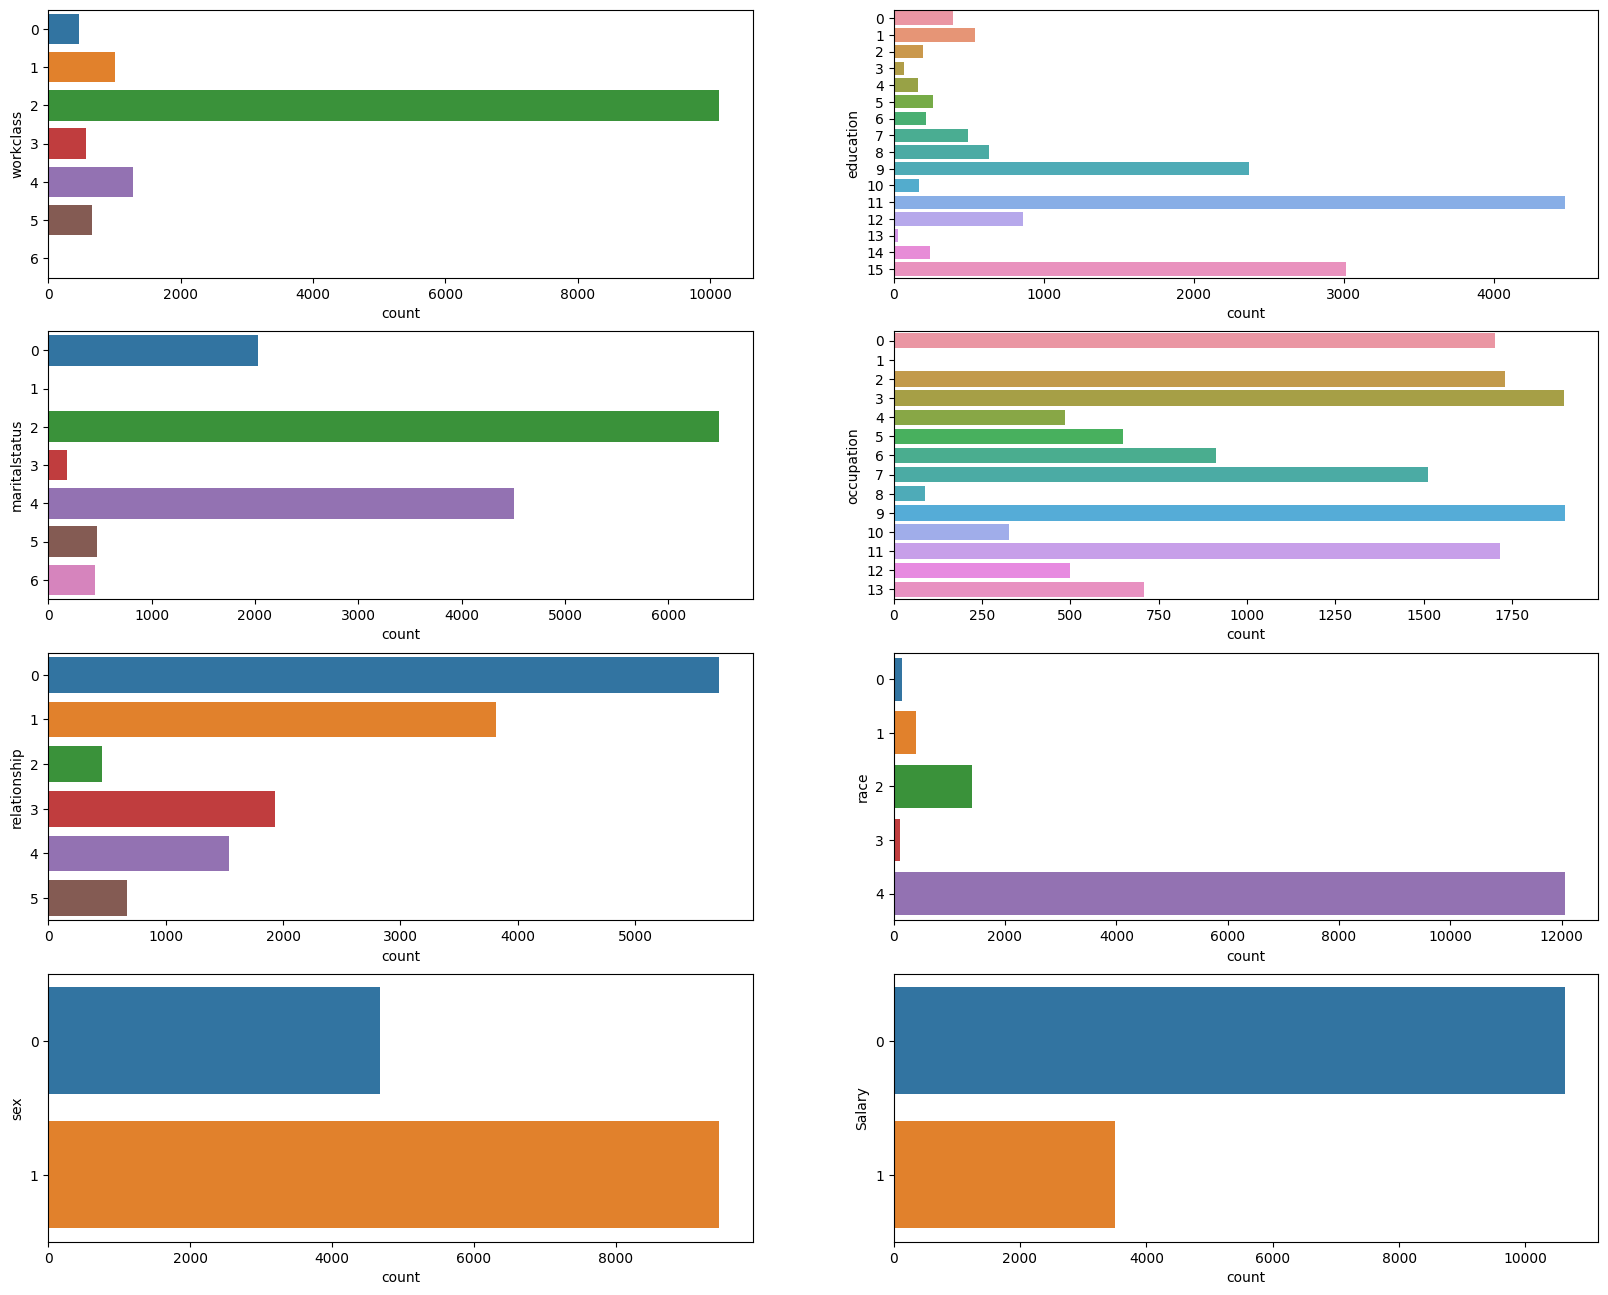

In [22]:
plt.subplots(figsize=(20,16))
[plt.subplot(4,2,1), sns.countplot(data=test, y='workclass')];

[plt.subplot(4,2,2), sns.countplot(data=test, y='education')];

[plt.subplot(4,2,3), sns.countplot(data=test, y='maritalstatus')];

[plt.subplot(4,2,4), sns.countplot(data=test, y='occupation')];

[plt.subplot(4,2,5), sns.countplot(data=test, y='relationship')];

[plt.subplot(4,2,6), sns.countplot(data=test, y='race')];

[plt.subplot(4,2,7), sns.countplot(data=test, y='sex')];

[plt.subplot(4,2,8), sns.countplot(data=test, y='Salary')];

In [23]:
#numeric variables in the test data

corr1= pd.DataFrame(test,columns = ['age','educationno','capitalgain','capitalloss','hoursperweek'])



In [24]:
corr= corr1.corr()
corr

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.021975,0.076768,0.053158,0.088130
educationno,0.021975,1.000000,0.132346,0.085651,0.127779
capitalgain,0.076768,0.132346,1.000000,-0.033929,0.089512
capitalloss,0.053158,0.085651,-0.033929,1.000000,0.056353
hoursperweek,0.088130,0.127779,0.089512,0.056353,1.000000


<Axes: >

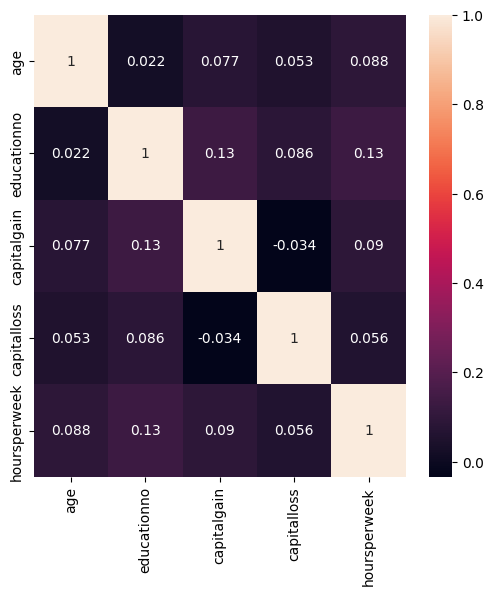

In [25]:
plt.figure(figsize=(6,6))
sns.heatmap(corr,annot=True)

<ipython-input-26-4fe4bb810bc6>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)
<ipython-input-26-4fe4bb810bc6>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test['age'],shade=True,color='g');


<Axes: xlabel='age'>

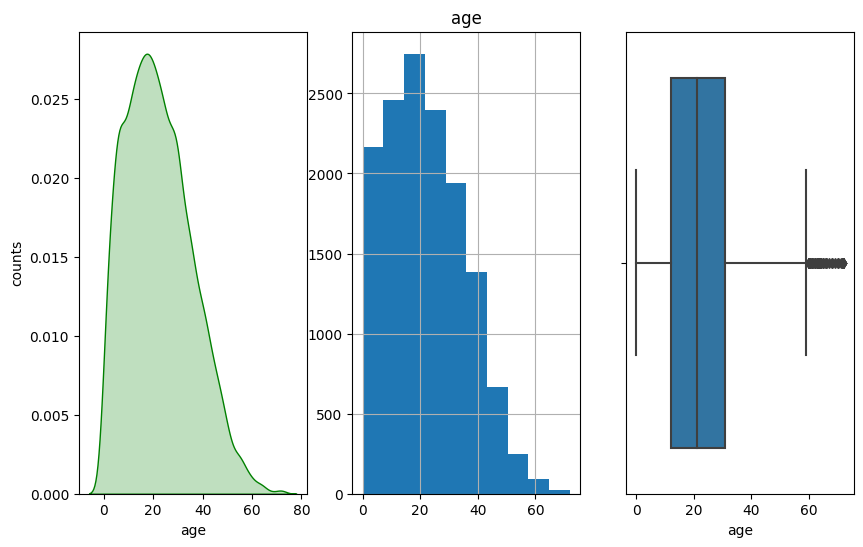

In [26]:
plt.subplots(figsize=(10,6))
plt.subplot(1,3,1)
sns.kdeplot(test['age'],shade=True,color='g');
plt.xlabel('age');
plt.ylabel('counts')
plt.subplot(1,3,2)
test['age'].hist()
plt.title("age")
plt.subplot(1,3,3)
sns.boxplot(x=test["age"])

In [39]:
#fully cleaned test dataset
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,7,4,6,3,2,1,0,0,40,37,0
1,21,2,11,9,2,4,0,4,1,0,0,50,37,0
2,11,1,7,12,2,10,0,4,1,0,0,40,37,1
3,27,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,17,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,16,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,22,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,21,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,27,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [28]:
x_train= train.iloc[:,0:13]
y_train= train['Salary']
x_test= test.iloc[:,0:13]
y_test= test['Salary']

#(assigning train and test data to the x and y variable)

In [29]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((26903, 13), (14130, 13), (26903,), (14130,))

In [30]:
clf= SVC()

parameters= {'kernel':['rbf'],
           'gamma':[0.001],
           'C':[0.1]}

gsv= GridSearchCV(clf , param_grid=parameters , cv=10)

gsv.fit(x_train,y_train)

#GridSearchCV for finding the best parameters for the modelbuilding

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1], 'gamma': [0.001], 'kernel': ['rbf']})

In [31]:
gsv.best_params_

#(these are the best parameters for the model building)

{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}

In [32]:
gsv.best_score_

#(the best score from the best parameters)

0.819053999356246

In [33]:
model= SVC(C=0.1,gamma=0.001)
model.fit(x_train,y_train)

SVC(C=0.1, gamma=0.001)

In [34]:
y_pred= model.predict(x_test)
y_pred

#prediction

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
accuracy= accuracy_score(y_test,y_pred) * 100
print(accuracy)

82.2009907997169


In [36]:
confusion_matrix(y_test, y_pred)

array([[10567,    53],
       [ 2462,  1048]])

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89     10620
           1       0.95      0.30      0.45      3510

    accuracy                           0.82     14130
   macro avg       0.88      0.65      0.67     14130
weighted avg       0.85      0.82      0.78     14130

